In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, metrics, neural_network, datasets
from sklearn.model_selection import GridSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [6]:
df=pd.read_csv('datos.csv')
df.head()

,x,y
0,-2.603637,4.683055
1,-2.421669,2.755887
2,0.910977,5.189905
3,0.564256,3.138361
4,-0.571315,0.325002


In [7]:
xVars = df[['x']]
yVars = df[['y']]
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(xVars, yVars, test_size=0.3, shuffle=True)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape, df.shape)

(350, 1) (150, 1) (350, 1) (150, 1) (500, 2)


In [8]:
from sklearn.preprocessing import MinMaxScaler
#toma las valores extremas del dataset y lo convierte del 0 a 1.
scaler = MinMaxScaler()
scaler.fit(x_train) #toma la referencia

x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

In [9]:
model = neural_network.MLPRegressor(activation= 'tanh',
                                 alpha=0.01,
                                 hidden_layer_sizes= (100, 50, 30),
                                 learning_rate= 'adaptive',
                                 learning_rate_init= 0.01,
                                 solver= 'sgd',
                                 max_iter=200)

model.fit(x_train, (y_train))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(100, 50, 30),
             learning_rate='adaptive', learning_rate_init=0.01, solver='sgd')

In [10]:
mae=metrics.mean_absolute_error(y_train, model.predict(x_train))
mse=metrics.mean_squared_error(y_train, model.predict(x_train))
rsq=metrics.r2_score(y_train, model.predict(x_train))
print (mae, mse, rsq)

0.7601497450446398 0.9723352680798676 0.838560841406627


In [11]:
mae=metrics.mean_absolute_error(y_valid, model.predict(x_valid))
mse=metrics.mean_squared_error(y_valid, model.predict(x_valid))
rsq=metrics.r2_score(y_valid, model.predict(x_valid))
print (mae, mse, rsq)

0.9002749947347252 1.308065156704654 0.7400035014449036


In [12]:
score = model.score(x_train, y_train)
print(f'R^2 score: {score}')

R^2 score: 0.838560841406627


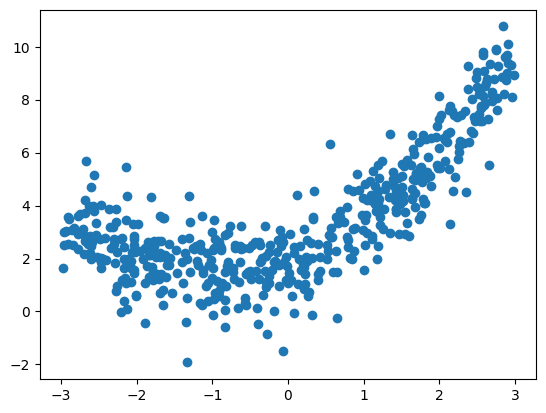

In [13]:
#xVars = scaler.transform(xVars)
plt.plot(xVars,yVars,'o')
